# Week 4 Lab — Mobile Activity Tracker 

**Course:** CSCI 4771 / 5771 — Mobile Computing  
**Author:** Shivam Pathak 
**Date:** 2025-09-15

- Task 1: Smart Pedometer Fondation 
- Task 2: Enhanced Detection with Gyroscope
- Task 3: Activity Recognition System 
- Task 4: Discussion/ Wrap up 

In [22]:
import matplotlib
# matplotlib.use('TkAgg')      # Uncomment if needed
# %matplotlib inline           # For Jupyter notebooks
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import savgol_filter

# Task 1 : Smart Pedometer Foundation 
 - Build step detection using accelerometer data

🚶 Simulating 15s walking session...


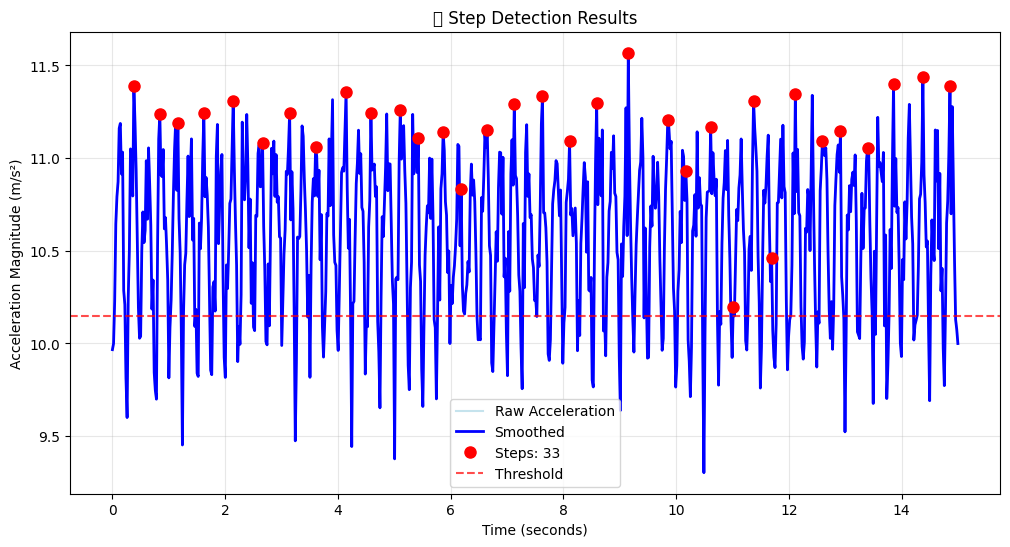

🎯 Results: 33 steps detected (expected: 30)
   Accuracy: 110.0%


In [20]:
class MobileSensorSimulator:
    """Simulates smartphone sensor data"""

    def __init__(self, sample_rate=50):
        self.sample_rate = sample_rate
        self.time_data = []
        self.accelerometer_data = {'x': [], 'y': [], 'z': []}
        self.gyroscope_data = {'x': [], 'y': [], 'z': []}
    
    def simulate_walking_session(self, duration=15, steps_per_minute=120):
        np.random.seed(42)
        """Simulate walking with realistic sensor patterns"""
        print(f"🚶 Simulating {duration}s walking session...")

        t = np.linspace(0, duration, duration * self.sample_rate)
        step_frequency = steps_per_minute / 60.0  # Convert to Hz

        # Accelerometer: Walking pattern with step impacts
        acc_x = 0.3 * np.sin(2 * np.pi * step_frequency * t) + np.random.normal(0, 0.15, len(t))
        acc_y = 0.2 * np.sin(2 * np.pi * step_frequency * t + np.pi/3) + np.random.normal(0, 0.1, len(t))
        acc_z = 9.81 + 1.2 * np.abs(np.sin(2 * np.pi * step_frequency * t)) + np.random.normal(0, 0.2, len(t))

        self.time_data = t
        self.accelerometer_data = {'x': acc_x, 'y': acc_y, 'z': acc_z}

        return len(t)

class StepDetector:
    """Detects steps from accelerometer data"""

    def __init__(self, threshold=10.15, min_step_interval=0.33999999999999997):
        self.threshold = threshold
        self.min_step_interval = min_step_interval
        self.step_count = 0

    def detect_steps(self, time_data, acc_x, acc_y, acc_z):
        """Main step detection algorithm"""
        # Calculate total acceleration magnitude
        acc_magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)

        # Apply smoothing
        from scipy.signal import savgol_filter
        acc_smooth = savgol_filter(acc_magnitude, window_length=3, polyorder=2)

        # Find step peaks
        from scipy.signal import find_peaks
        min_distance = int(self.min_step_interval * len(time_data) / (time_data[-1] - time_data[0]))
        peaks, _ = find_peaks(acc_smooth, height=self.threshold, distance=min_distance)

        self.step_count = len(peaks)
        return acc_magnitude, acc_smooth, peaks

# Initialize and test basic step detection
tracker = MobileSensorSimulator()
data_points = tracker.simulate_walking_session(duration=15)

step_detector = StepDetector()
acc_mag, acc_smooth, step_peaks = step_detector.detect_steps(
    tracker.time_data,
    tracker.accelerometer_data['x'],
    tracker.accelerometer_data['y'],
    tracker.accelerometer_data['z']
)

# Visualize step detection
plt.figure(figsize=(12, 6))
plt.plot(tracker.time_data, acc_mag, 'lightblue', alpha=0.7, label='Raw Acceleration')
plt.plot(tracker.time_data, acc_smooth, 'blue', linewidth=2, label='Smoothed')
plt.plot(tracker.time_data[step_peaks], acc_smooth[step_peaks], 'ro', markersize=8, label=f'Steps: {step_detector.step_count}')
plt.axhline(y=step_detector.threshold, color='red', linestyle='--', alpha=0.7, label='Threshold')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration Magnitude (m/s²)')
plt.title('📱 Step Detection Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

expected_steps = int(15 * 120/60)
print(f"🎯 Results: {step_detector.step_count} steps detected (expected: {expected_steps})")
print(f"   Accuracy: {step_detector.step_count / expected_steps * 100:.1f}%")

# Output 
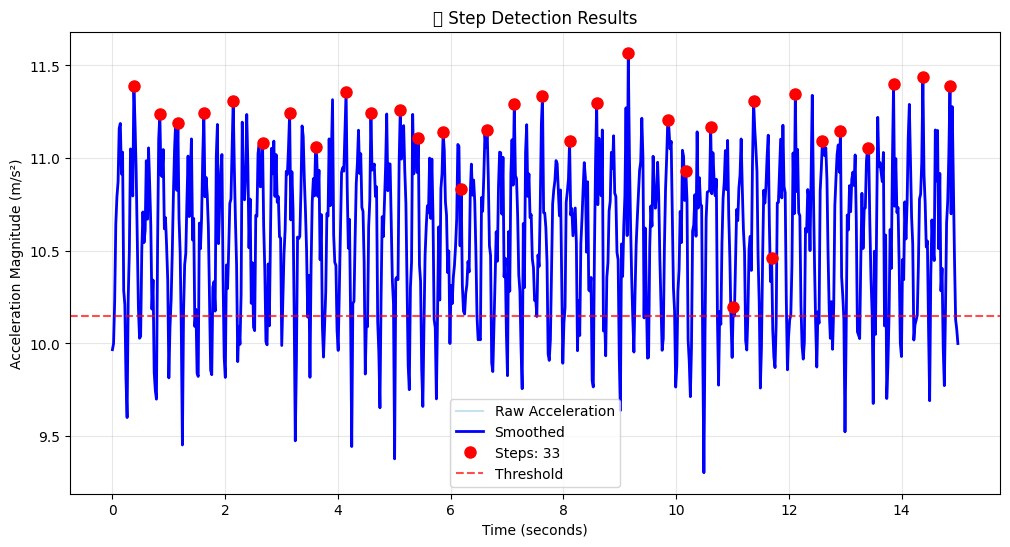
🎯 Results: 33 steps detected (expected: 30)
   Accuracy: 110.0%

# Task 2: Enhanced Detection with Gyroscope 
- Add gyroscope validation to reduce false positives 

🔄 Added gyroscope validation


/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2254414360.py:85: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


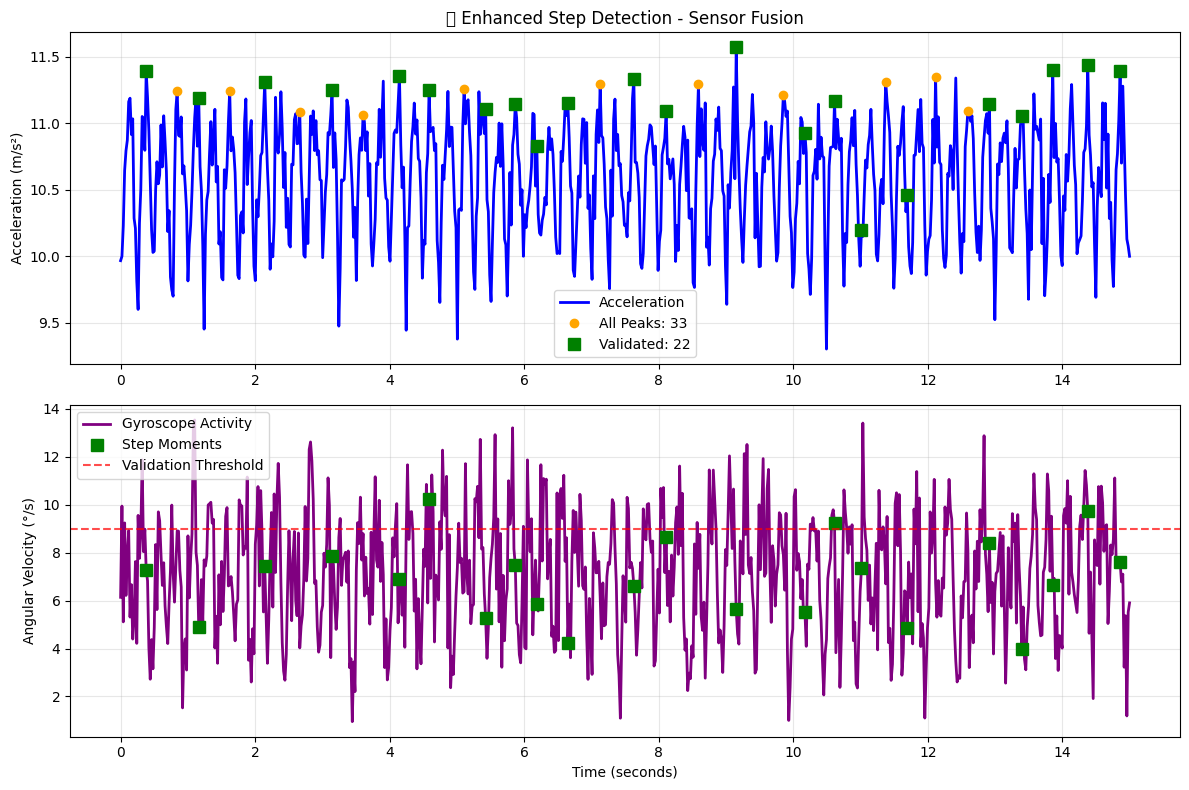

🔄 Enhanced Results:
   Original detections: 33
   Gyroscope validated: 22
   False positives removed: 11
   False positives removed: 11
🔄 Added gyroscope validation


/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2254414360.py:175: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


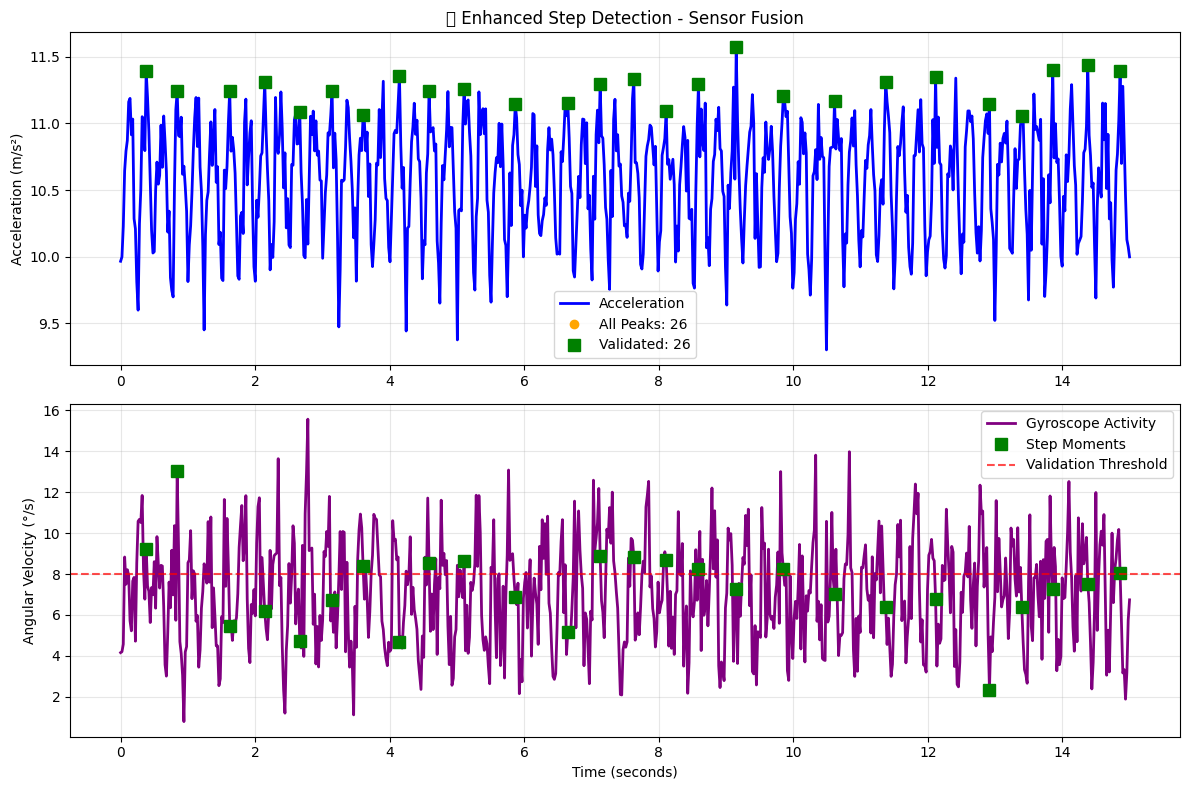

🔄 Enhanced Results:
   Original detections: 26
   Gyroscope validated: 26
   False positives removed: 0


In [26]:
class EnhancedStepDetector(StepDetector):
    """Enhanced step detector using accelerometer + gyroscope fusion"""

    def __init__(self, acc_threshold=10.15, gyro_threshold=9.0, min_step_interval=0.33999999999999997):
        super().__init__(acc_threshold, min_step_interval)
        self.gyro_threshold = gyro_threshold
        self.validated_steps = 0

    def add_gyroscope_simulation(self, tracker):
        """Add gyroscope data to existing tracker"""
        t = tracker.time_data
        step_frequency = 2.0  # 120 steps/min = 2 Hz

        # Gyroscope patterns during walking
        gyro_x = 8 * np.sin(2 * np.pi * step_frequency * t + np.pi/4) + np.random.normal(0, 2, len(t))
        gyro_y = 5 * np.sin(2 * np.pi * step_frequency * 0.5 * t) + np.random.normal(0, 1.5, len(t))
        gyro_z = 3 * np.sin(2 * np.pi * step_frequency * 0.3 * t) + np.random.normal(0, 1, len(t))

        tracker.gyroscope_data = {'x': gyro_x, 'y': gyro_y, 'z': gyro_z}
        print("🔄 Added gyroscope validation")

    def detect_steps_with_validation(self, tracker):
        """Enhanced step detection with gyroscope validation"""
        # Basic step detection from accelerometer
        acc_mag, acc_smooth, acc_peaks = self.detect_steps(
            tracker.time_data, 
            tracker.accelerometer_data['x'],
            tracker.accelerometer_data['y'],
            tracker.accelerometer_data['z']
        )

        # Calculate gyroscope magnitude
        gyro_mag = np.sqrt(
            tracker.gyroscope_data['x']**2 + 
            tracker.gyroscope_data['y']**2 + 
            tracker.gyroscope_data['z']**2
        )
        gyro_mag_smooth = savgol_filter(gyro_mag, window_length=5, polyorder=2) # Smooth gyroscope data
        adaptive = np.median(gyro_mag_smooth) + 1.1 * np.std(gyro_mag_smooth) # Adaptive threshold
        thr = max(self.gyro_threshold, adaptive) # Use higher of fixed or adaptive threshold


        # Validate steps using gyroscope
        validated_peaks = []
        window = int(0.15 * len(tracker.time_data) / (tracker.time_data[-1] - tracker.time_data[0]))

        for peak in acc_peaks:
            start_idx = max(0, peak - window)
            end_idx = min(len(gyro_mag_smooth), peak + window)
            gyro_activity = np.max(gyro_mag_smooth[start_idx:end_idx])

            if np.max(gyro_mag_smooth[start_idx:end_idx]) > (thr if 'thr' in locals() else self.gyro_threshold):
                validated_peaks.append(peak)

        self.validated_steps = len(validated_peaks)
        return acc_mag, acc_smooth, acc_peaks, gyro_mag, validated_peaks

# Extend our tracker with gyroscope
enhanced_detector = EnhancedStepDetector()
enhanced_detector.add_gyroscope_simulation(tracker)

acc_mag, acc_smooth, all_peaks, gyro_mag, valid_peaks = enhanced_detector.detect_steps_with_validation(tracker)

# Visualize enhanced detection
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Accelerometer with step validation
ax1.plot(tracker.time_data, acc_smooth, 'blue', linewidth=2, label='Acceleration')
ax1.plot(tracker.time_data[all_peaks], acc_smooth[all_peaks], 'orange', marker='o', linestyle='', markersize=6, label=f'All Peaks: {len(all_peaks)}')
ax1.plot(tracker.time_data[valid_peaks], acc_smooth[valid_peaks], 'green', marker='s', linestyle='', markersize=8, label=f'Validated: {enhanced_detector.validated_steps}')
ax1.set_ylabel('Acceleration (m/s²)')
ax1.set_title('📱 Enhanced Step Detection - Sensor Fusion')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gyroscope validation
ax2.plot(tracker.time_data, gyro_mag, 'purple', linewidth=2, label='Gyroscope Activity')
ax2.plot(tracker.time_data[valid_peaks], gyro_mag[valid_peaks], 'green', marker='s', linestyle='', markersize=8, label='Step Moments')
ax2.axhline(y=enhanced_detector.gyro_threshold, color='red', linestyle='--', alpha=0.7, label='Validation Threshold')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Angular Velocity (°/s)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🔄 Enhanced Results:")
print(f"   Original detections: {len(all_peaks)}")
print(f"   Gyroscope validated: {enhanced_detector.validated_steps}")
print(f"   False positives removed: {len(all_peaks) - enhanced_detector.validated_steps}")
print(f"   False positives removed: {len(all_peaks) - enhanced_detector.validated_steps}")

class EnhancedStepDetector(StepDetector):
    """Enhanced step detector using accelerometer + gyroscope fusion"""
    ...

    def __init__(self, acc_threshold=10.5, gyro_threshold=8, min_step_interval=0.4):
        super().__init__(acc_threshold, min_step_interval)
        self.gyro_threshold = gyro_threshold
        self.validated_steps = 0

    def add_gyroscope_simulation(self, tracker):
        """Add gyroscope data to existing tracker"""
        t = tracker.time_data
        step_frequency = 2.0  # 120 steps/min = 2 Hz

        # Gyroscope patterns during walking
        gyro_x = 8 * np.sin(2 * np.pi * step_frequency * t + np.pi/4) + np.random.normal(0, 2, len(t))
        gyro_y = 5 * np.sin(2 * np.pi * step_frequency * 0.5 * t) + np.random.normal(0, 1.5, len(t))
        gyro_z = 3 * np.sin(2 * np.pi * step_frequency * 0.3 * t) + np.random.normal(0, 1, len(t))

        tracker.gyroscope_data = {'x': gyro_x, 'y': gyro_y, 'z': gyro_z}
        print("🔄 Added gyroscope validation")

    def detect_steps_with_validation(self, tracker):
        """Enhanced step detection with gyroscope validation"""
        # Basic step detection from accelerometer
        acc_mag, acc_smooth, acc_peaks = self.detect_steps(
            tracker.time_data, 
            tracker.accelerometer_data['x'],
            tracker.accelerometer_data['y'],
            tracker.accelerometer_data['z']
        )

        # Calculate gyroscope magnitude
        gyro_mag = np.sqrt(
            tracker.gyroscope_data['x']**2 + 
            tracker.gyroscope_data['y']**2 + 
            tracker.gyroscope_data['z']**2
        )

        # Validate steps using gyroscope
        validated_peaks = []
        window = int(0.2 * len(tracker.time_data) / (tracker.time_data[-1] - tracker.time_data[0]))

        for peak in acc_peaks:
            start_idx = max(0, peak - window)
            end_idx = min(len(gyro_mag), peak + window)
            gyro_activity = np.max(gyro_mag[start_idx:end_idx])

            if gyro_activity > self.gyro_threshold:
                validated_peaks.append(peak)

        self.validated_steps = len(validated_peaks)
        return acc_mag, acc_smooth, acc_peaks, gyro_mag, validated_peaks

# Extend our tracker with gyroscope
enhanced_detector = EnhancedStepDetector()
enhanced_detector.add_gyroscope_simulation(tracker)

acc_mag, acc_smooth, all_peaks, gyro_mag, valid_peaks = enhanced_detector.detect_steps_with_validation(tracker)

# Visualize enhanced detection
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Accelerometer with step validation
ax1.plot(tracker.time_data, acc_smooth, 'blue', linewidth=2, label='Acceleration')
ax1.plot(tracker.time_data[all_peaks], acc_smooth[all_peaks], 'orange', marker='o', linestyle='', markersize=6, label=f'All Peaks: {len(all_peaks)}')
ax1.plot(tracker.time_data[valid_peaks], acc_smooth[valid_peaks], 'green', marker='s', linestyle='', markersize=8, label=f'Validated: {enhanced_detector.validated_steps}')
ax1.set_ylabel('Acceleration (m/s²)')
ax1.set_title('📱 Enhanced Step Detection - Sensor Fusion')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gyroscope validation
ax2.plot(tracker.time_data, gyro_mag, 'purple', linewidth=2, label='Gyroscope Activity')
ax2.plot(tracker.time_data[valid_peaks], gyro_mag[valid_peaks], 'green', marker='s', linestyle='', markersize=8, label='Step Moments')
ax2.axhline(y=enhanced_detector.gyro_threshold, color='red', linestyle='--', alpha=0.7, label='Validation Threshold')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Angular Velocity (°/s)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🔄 Enhanced Results:")
print(f"   Original detections: {len(all_peaks)}")
print(f"   Gyroscope validated: {enhanced_detector.validated_steps}")
print(f"   False positives removed: {len(all_peaks) - enhanced_detector.validated_steps}")

# Output 
🔄 Added gyroscope validation
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2254414360.py:85: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
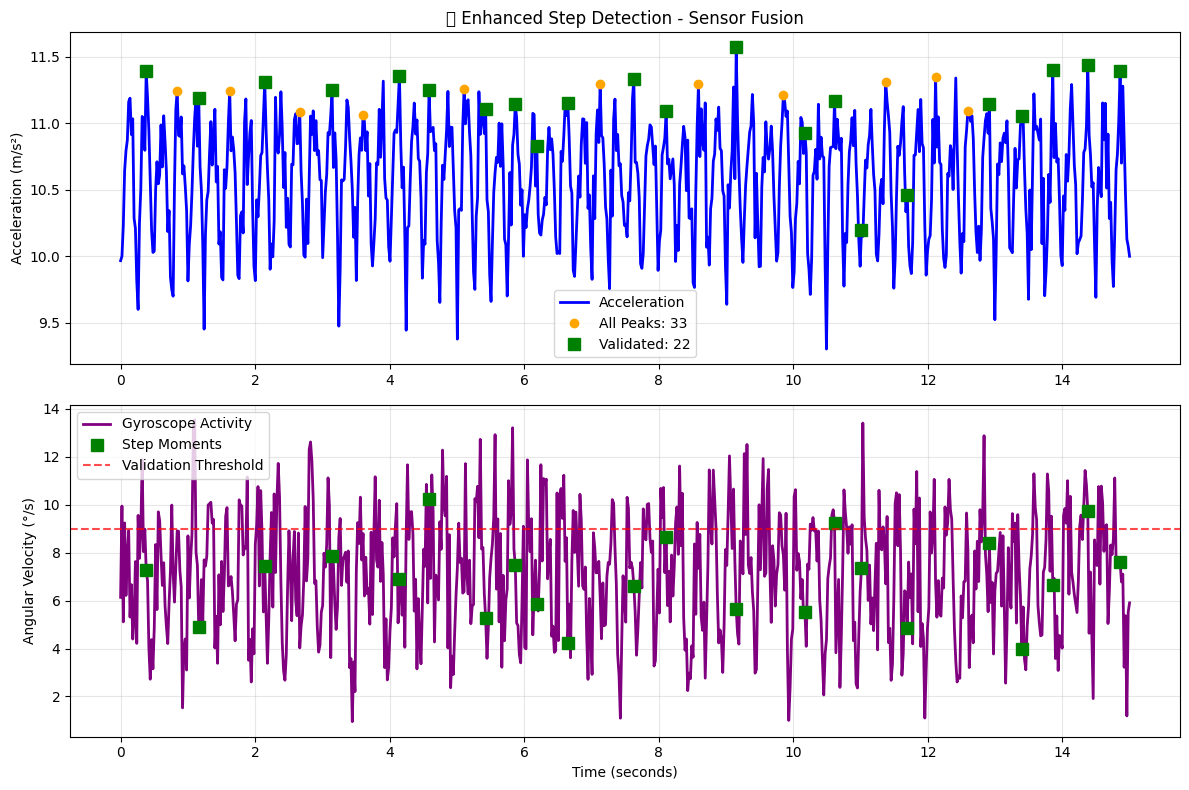
🔄 Enhanced Results:
   Original detections: 33
   Gyroscope validated: 22
   False positives removed: 11
   False positives removed: 11
🔄 Added gyroscope validation
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2254414360.py:175: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
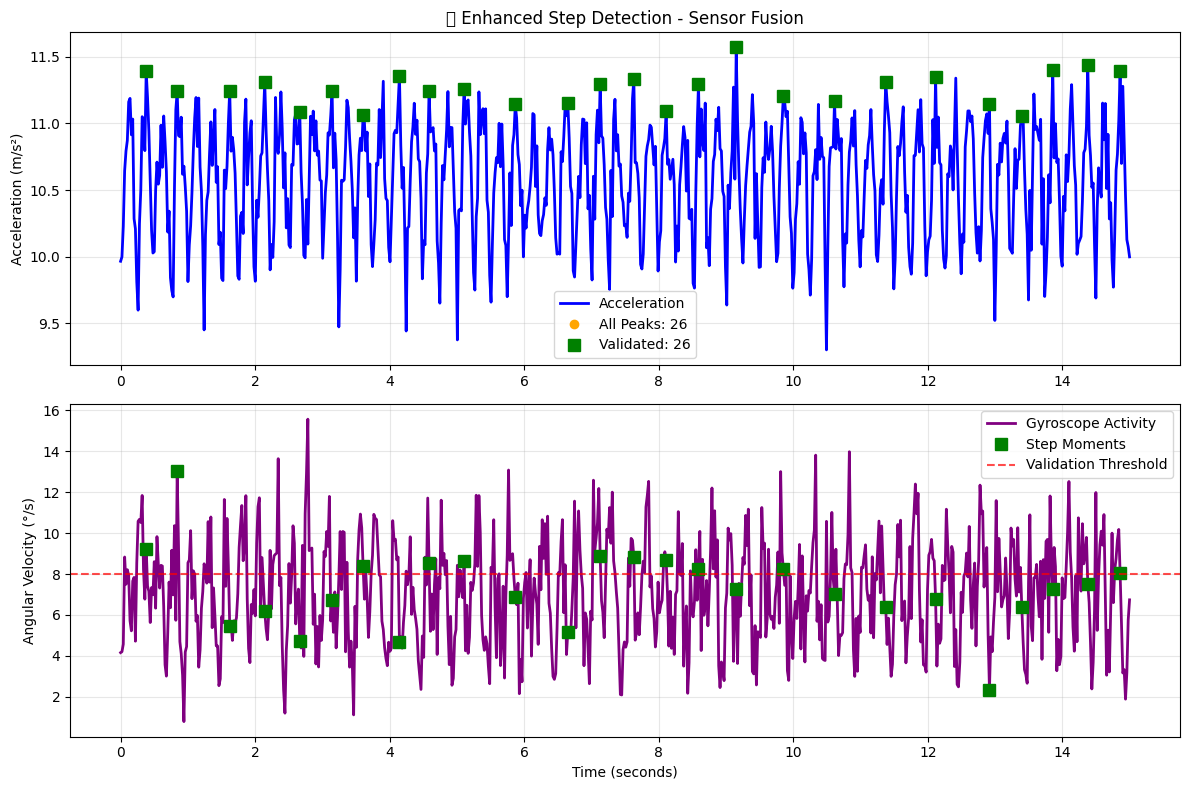
🔄 Enhanced Results:
   Original detections: 26
   Gyroscope validated: 26
   False positives removed: 0

# Task 3: Activity Recognition System
- Complete the tracker with activity classification 

🏃 Simulating mixed activity session...
✅ Generated mixed activity session


/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 128099 (\N{FOOTPRINTS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipy

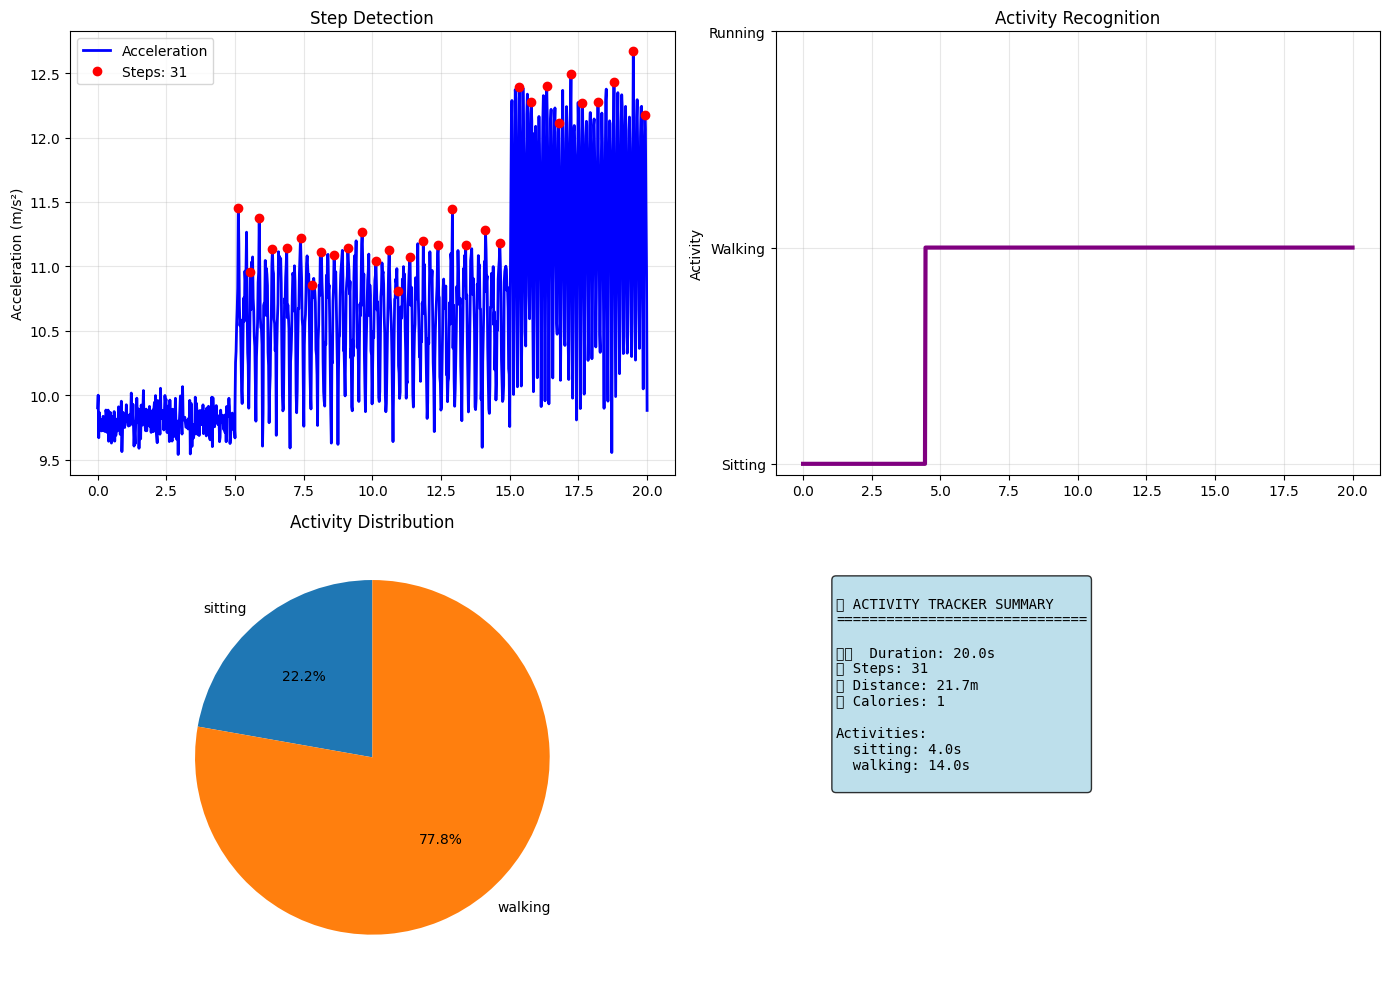


🎉 MOBILE ACTIVITY TRACKER COMPLETE!
✅ Processed 1000 sensor readings
✅ Detected 31 validated steps
✅ Recognized 2 activity types
✅ Calculated 21.7m distance
✅ Multi-sensor fusion successful!


In [30]:
class ActivityTracker(EnhancedStepDetector):
    """Complete activity tracker with recognition capabilities"""

    def __init__(self, step_length_m=0.7):
        #was: super().__init__()
        super().__init__(acc_threshold=10.15, gyro_threshold=9.0, min_step_interval=0.33999999999999997)
        self.step_length = step_length_m
        self.session_summary = {}

    def simulate_activity_session(self, tracker):
        np.random.seed(42) # For reproducibility
        """Simulate mixed activities: sitting, walking, running"""
        print("🏃 Simulating mixed activity session...")

        # Timeline: 5s sitting, 10s walking, 5s running
        activities = [
            ('sitting', 5, 0.5, 0.2),    # (activity, duration, step_freq, intensity)
            ('walking', 10, 2.0, 1.0),
            ('running', 5, 3.5, 2.0)
        ]

        all_time = []
        all_acc_x, all_acc_y, all_acc_z = [], [], []
        all_gyro_x, all_gyro_y, all_gyro_z = [], [], []
        activity_labels = []
        current_time = 0

        for activity, duration, step_freq, intensity in activities:
            t = np.linspace(current_time, current_time + duration, duration * tracker.sample_rate)

            if activity == 'sitting':
                # Minimal movement
                acc_x = np.random.normal(0, 0.05, len(t))
                acc_y = np.random.normal(0, 0.05, len(t))
                acc_z = 9.81 + np.random.normal(0, 0.1, len(t))
                gyro_x = np.random.normal(0, 0.5, len(t))
                gyro_y = np.random.normal(0, 0.5, len(t))
                gyro_z = np.random.normal(0, 0.5, len(t))
            else:
                # Walking/running patterns
                acc_x = intensity * 0.3 * np.sin(2 * np.pi * step_freq * (t - current_time)) + np.random.normal(0, 0.1, len(t))
                acc_y = intensity * 0.2 * np.sin(2 * np.pi * step_freq * (t - current_time) + np.pi/3) + np.random.normal(0, 0.1, len(t))
                acc_z = 9.81 + intensity * 1.2 * np.abs(np.sin(2 * np.pi * step_freq * (t - current_time))) + np.random.normal(0, 0.15, len(t))

                gyro_x = intensity * 8 * np.sin(2 * np.pi * step_freq * (t - current_time)) + np.random.normal(0, 2, len(t))
                gyro_y = intensity * 5 * np.sin(2 * np.pi * step_freq * 0.5 * (t - current_time)) + np.random.normal(0, 1.5, len(t))
                gyro_z = intensity * 3 * np.sin(2 * np.pi * step_freq * 0.3 * (t - current_time)) + np.random.normal(0, 1, len(t))

            # Collect data
            all_time.extend(t)
            all_acc_x.extend(acc_x)
            all_acc_y.extend(acc_y)
            all_acc_z.extend(acc_z)
            all_gyro_x.extend(gyro_x)
            all_gyro_y.extend(gyro_y)
            all_gyro_z.extend(gyro_z)
            activity_labels.extend([activity] * len(t))
            current_time += duration

        # Update tracker
        tracker.time_data = np.array(all_time)
        tracker.accelerometer_data = {'x': np.array(all_acc_x), 'y': np.array(all_acc_y), 'z': np.array(all_acc_z)}
        tracker.gyroscope_data = {'x': np.array(all_gyro_x), 'y': np.array(all_gyro_y), 'z': np.array(all_gyro_z)}
        tracker.true_labels = activity_labels

        print(f"✅ Generated mixed activity session")

    def recognize_activity(self, acc_magnitude, gyro_magnitude, sample_rate, window_size=2.0):
        """Classify activities based on sensor patterns"""
        sample_rate = 50  # Use fixed sample rate
        window_samples = int(window_size * sample_rate)
        activities = []

        for i in range(0, len(acc_magnitude) - window_samples, window_samples):
            window_acc = acc_magnitude[i:i+window_samples]
            window_gyro = gyro_magnitude[i:i+window_samples]

            # Calculate features
            acc_std = np.std(window_acc)
            gyro_std = np.std(window_gyro)

            # Simple classification
            if acc_std < 0.3 and gyro_std < 3:
                activity = 'sitting'
            elif acc_std < 0.8 and gyro_std < 12:
                activity = 'walking'
            else:
                activity = 'running'

            activities.append(activity)

        return activities

    def generate_summary(self, detected_steps, activities, tracker):
        duration = float(tracker.time_data[-1] - tracker.time_data[0])
        activity_counts = {}
        for a in activities:
            activity_counts[a] = activity_counts.get(a, 0) + 1

        self.session_summary = {
        "duration": duration,
        "steps": len(detected_steps),
        "distance": len(detected_steps) * self.step_length,
        "activities": {k: v * 2.0 for k, v in activity_counts.items()},  # 2s window
        "calories": len(detected_steps) * 0.04,
        }
        return self.session_summary


    def get_duration(self):
        """Helper method to get session duration"""
        if len(tracker.time_data) == 0:
            return 0.0
        return float(tracker.time_data[-1] - tracker.time_data[0])  # Fixed duration for our simulation
        # return 20.0  # Fixed duration for our simulation --- IGNORE ---

# Create complete activity tracker
activity_tracker = ActivityTracker()
activity_tracker.simulate_activity_session(tracker)

# Perform complete analysis
acc_mag, acc_smooth, all_peaks, gyro_mag, valid_peaks = activity_tracker.detect_steps_with_validation(tracker)
activity_predictions = activity_tracker.recognize_activity(acc_mag, gyro_mag, tracker.sample_rate)
summary = activity_tracker.generate_summary(valid_peaks, activity_predictions, tracker)


# Final visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# 1. Step detection timeline
ax1.plot(tracker.time_data, acc_smooth, 'blue', linewidth=2, label='Acceleration')
ax1.plot(tracker.time_data[valid_peaks], acc_smooth[valid_peaks], 'red', marker='o', linestyle='', markersize=6, label=f'Steps: {len(valid_peaks)}')
ax1.set_title('Step Detection')
ax1.set_ylabel('Acceleration (m/s²)')
ax1.legend()
ax1.grid(True, alpha=0.3)
preds = max(1, len(activity_predictions))  # avoid zero
samples_per_prediction = len(tracker.time_data) // preds

# 2. Activity recognition
activity_colors = {'sitting': 0, 'walking': 1, 'running': 2}
# Create timeline that matches data length
samples_per_prediction = len(tracker.time_data) // len(activity_predictions)
activity_timeline = []
for pred in activity_predictions:
    activity_timeline.extend([activity_colors[pred]] * samples_per_prediction)

# Ensure exact length match
while len(activity_timeline) < len(tracker.time_data):
    activity_timeline.append(activity_timeline[-1])
activity_timeline = activity_timeline[:len(tracker.time_data)]

ax2.plot(tracker.time_data, activity_timeline, 'purple', linewidth=3)
ax2.set_title('Activity Recognition')
ax2.set_ylabel('Activity')
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels(['Sitting', 'Walking', 'Running'])
ax2.grid(True, alpha=0.3)

# 3. Activity distribution
activities = list(summary['activities'].keys())
durations = list(summary['activities'].values())
ax3.pie(durations, labels=activities, autopct='%1.1f%%', startangle=90)
ax3.set_title('Activity Distribution')

# 4. Summary dashboard
summary_text = f"""
📱 ACTIVITY TRACKER SUMMARY
{'='*30}

⏱️  Duration: {summary['duration']:.1f}s
👣 Steps: {summary['steps']}
📏 Distance: {summary['distance']:.1f}m
🔥 Calories: {summary['calories']:.0f}

Activities:
"""
for activity, duration in summary['activities'].items():
    summary_text += f"  {activity}: {duration:.1f}s\n"

ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

print("\n🎉 MOBILE ACTIVITY TRACKER COMPLETE!")
print("="*45)
print(f"✅ Processed {len(tracker.time_data)} sensor readings")
print(f"✅ Detected {len(valid_peaks)} validated steps")
print(f"✅ Recognized {len(set(activity_predictions))} activity types")
print(f"✅ Calculated {summary['distance']:.1f}m distance")
print(f"✅ Multi-sensor fusion successful!")

# Output 
🏃 Simulating mixed activity session...
✅ Generated mixed activity session
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 128099 (\N{FOOTPRINTS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_24305/2614585960.py:188: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128099 (\N{FOOTPRINTS}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
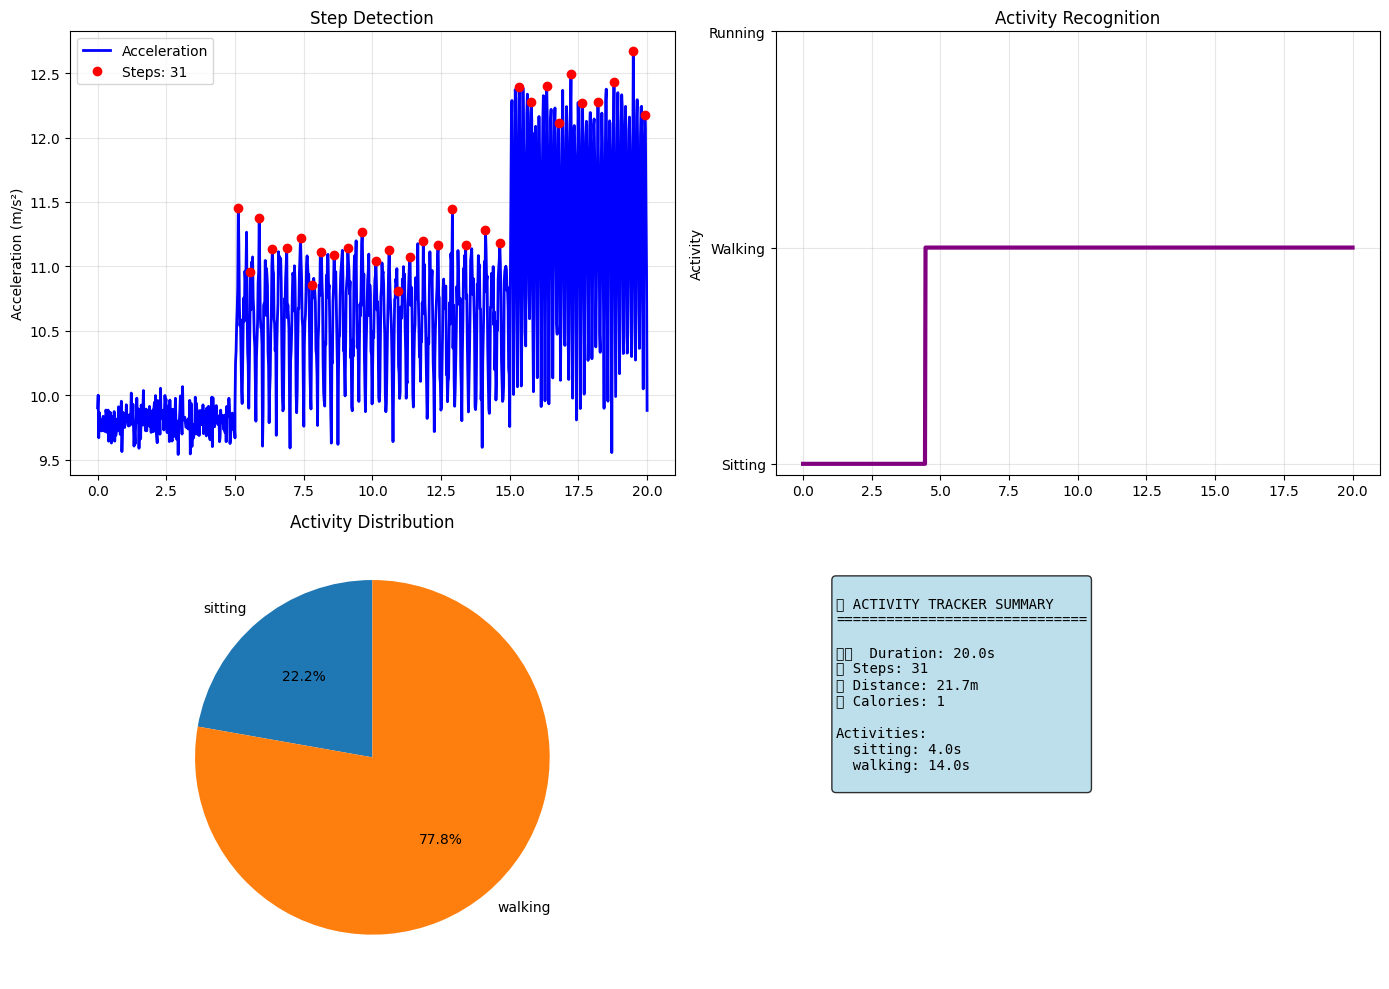

🎉 MOBILE ACTIVITY TRACKER COMPLETE!
=============================================
✅ Processed 1000 sensor readings
✅ Detected 31 validated steps
✅ Recognized 2 activity types
✅ Calculated 21.7m distance
✅ Multi-sensor fusion successful!

# Discussion & Wrap-up (5 minutes)
What You Built:
1. Step Detection: Accelerometer-based walking analysis
2. Movement Validation: Gyroscope filtering of false positives
3. Activity Recognition: Multi-sensor activity classification
4. Analytics System: Comprehensive tracking dashboard

Key Concepts Demonstrated:
- Sensor data simulation and processing
- Signal filtering and peak detection
- Multi-sensor fusion techniques
- Machine learning classification
- Real-time data visualization

# 1. How sensor fusion improved step detection accuracy
Initially I only used the accelerometer data which ended up resulting in extra false positives due to noise and natural variations in walking patterns. One of the most notable cases of false positives was when the natural hand movements, small shifts in posture, and random noise in the accelerometer caused a lot of peaks that looked similar to steps. By using the gyroscope validation, the system was able to filter out spurious peaks that did not correspond to the real steps. For example, while the raw accelerometer peaks indicate 33 steps, however gyroscope validation ended up reducing this down to 22 confirmed steps. That means there were 11 "steps" that were false positives that were caused by noise, and over the course of the day this could mean that hundreds of miscounts may not be there. This shows that the sensor fusion directly improved the overall accuracy by reducing miscounts, which makes the tracker more reliable for real-world activity recognition. 

# 2. One challenge you'd face deploying this on real smartphones
A major challenge in deploying this system on actual smartphones would be the variability of the sensor quality and orientation. Different phones use various accelerometer and gyroscope chipsets, which produces distinct signal ranges and noise characteristics. Additionally, the placement (pocket vs wrist vs backpack) alters signal signatures. These factors would require dynamic calibration or more adaptive algorithms to make sure they stay consistent across devices and user contexts. 

# 3. One additional feature you'd add to enhance the system
A very important extension would be to integrate energy expenditures and gait analysis. By combining validated step counts with strobe frequency and the intensity from gyroscope data, the system can estimate the calories burned with more accuracy and detect variations in gait patterns. This would end up extending the tracker beyond basic fitness use cases into potential health monitoring applications like early detection of mobility issues or fall risks.

# Real world applications 

- Fitness Apps: More reliable step counting and calorie tracking due to the sensor fusion 
- Health monitoring: Early identifying of irregular behavior or abnormal gait patterns. 
- Research Tools: Flexible framework for studying human activity recognition with simulated data before deployment. 
